# EDA Metabolic syndrom

Exploratory Data notebook for the dataset https://www.kaggle.com/datasets/antimoni/metabolic-syndrome/data

First we import the packages we will use for the exploration :
- matplotlib
- pandas
- seaborn

What we want to see : 
- If the dataset follows the society's general tendencies so that it can be compared properly
- Check the correlation between featuempiric

In [17]:
from matplotlib import pyplot as plt
import plotly.express as px
import pandas as pd
import seaborn as sns
import numpy as np
from dataclasses import dataclass
import joypy

df = pd.read_csv('Metabolic Syndrome.csv', sep = ',')

## Some basics

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 281.5+ KB


In [10]:
df.describe(include='O').T

count unique      top  freq
Sex      2401      2   Female  1211
Marital  2193      5  Married  1192
Race     2401      6    White   933

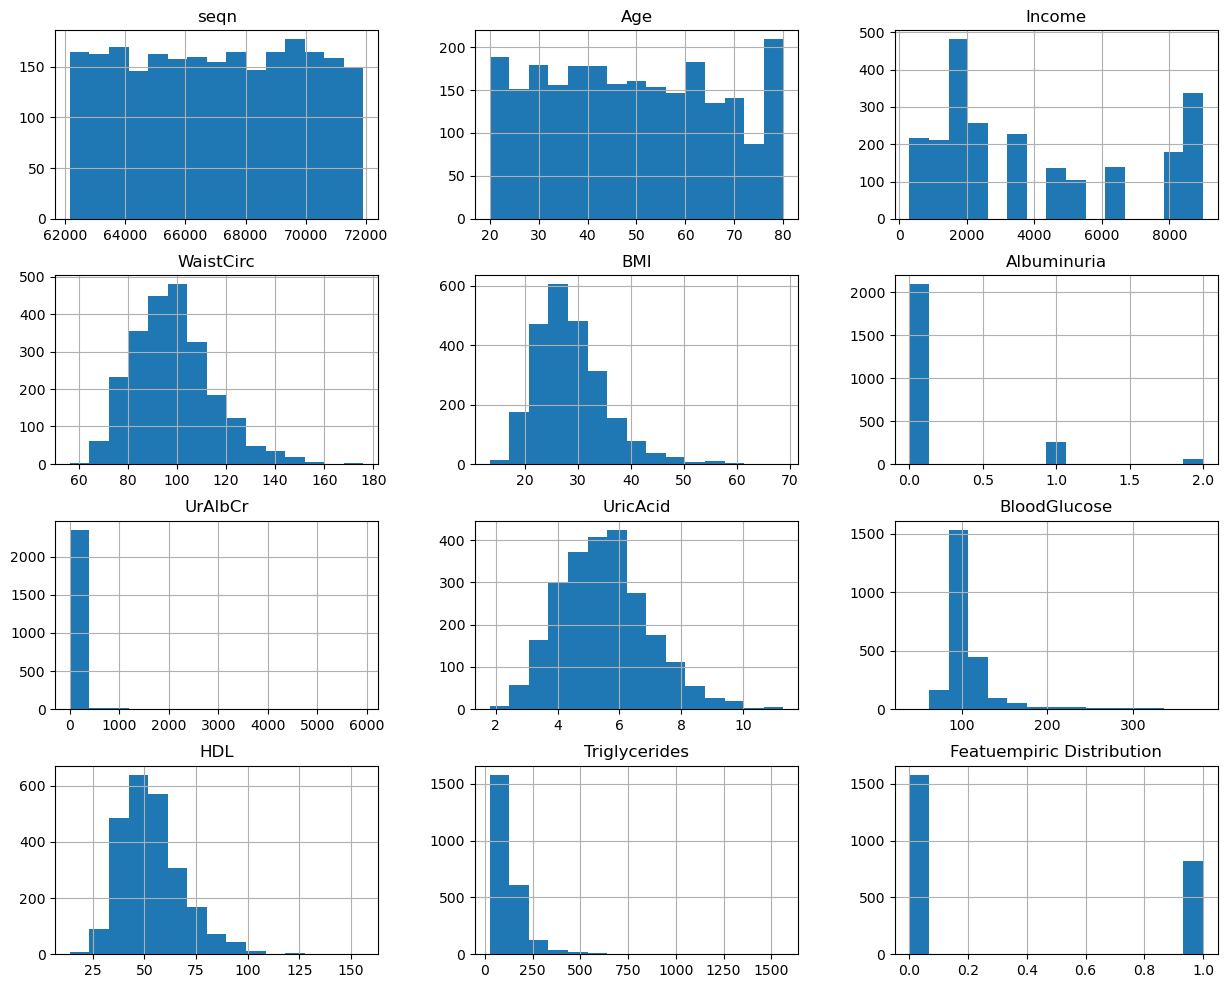

In [11]:
df.hist(figsize=(15,12),bins = 15)
plt.title("Featuempiric Distribution")
plt.show()

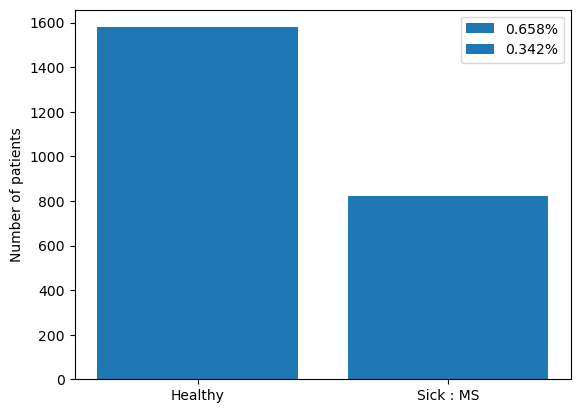

In [15]:
#counts the number of patients healthy and with MS
sex_colors = {'Male':'#377eb8', 'Female':'#f781bf'}

target = df.MetabolicSyndrome.value_counts()

plt.bar(["Healthy", "Sick : MS"], [i for i in list(target)], label=[f"{np.round(target[0]/sum(list(target)), 3)}%", f"{np.round(target[1]/sum(list(target)),3)}%"])
plt.ylabel("Number of patients")
plt.legend()

In [22]:
def check_met(value):
    if value == 1:
        return 'Metabolic Syndrome'
    else:
        return 'Healthy'

df['Metabolic_Dist'] = df['MetabolicSyndrome'].apply(check_met)

In [18]:
df['Sex'] = df['Sex'].astype('string').fillna('NaN')
df['Marital'] = df['Marital'].astype('string').fillna('NaN')
df['Race'] = df['Race'].astype('string').fillna('NaN')

fig = px.sunburst(df, path = ['Sex', 'Marital', 'Race'], color = 'Sex', color_discrete_map = sex_colors)
fig.update_traces(textinfo = "label + value")

fig.update_layout(autosize=False, width=1000,height=800)

In [23]:
def kde_boxplot(df,df_col):
    for col in df_col:
        fig, axes = plt.subplots(1, 2, figsize=(18, 5))
        
        sns.histplot(df, x = col, hue = 'Metabolic_Dist', kde = True, multiple="stack", ax=axes[0])
        
        sns.boxplot(df, y = 'Sex', x = col, hue = 'Metabolic_Dist', ax=axes[1])
        
        fig.suptitle(f'Numeric Feature : {col}', fontsize=16, fontweight='bold')
        fig.subplots_adjust(wspace=0.2)
        plt.show()

C:\Users\matte\AppData\Local\Temp\ipykernel_8416\2905107177.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\matte\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\matte\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



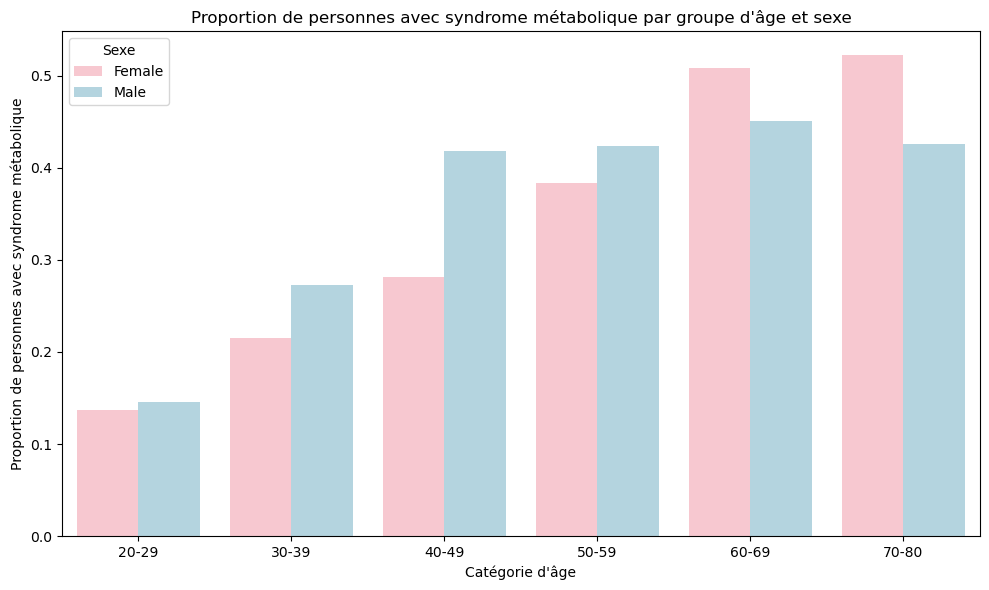

In [28]:
### Bar plot du metabolic syndrome par groupe d'age et sexe

# Création de catégories d'âges
bins = [20, 30, 40, 50, 60, 70, 81]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69','70-80']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calcul de la proportion de personnes atteintes du syndrome métabolique par groupe d'âge et sexe
grouped = df.groupby(['AgeGroup', 'Sex'])['MetabolicSyndrome'].mean().reset_index()

# Création du barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='AgeGroup', y='MetabolicSyndrome', hue='Sex', palette= {'Male': 'lightblue', 'Female': 'pink'})
plt.title('Proportion de personnes avec syndrome métabolique par groupe d\'âge et sexe')
plt.xlabel('Catégorie d\'âge')
plt.ylabel('Proportion de personnes avec syndrome métabolique')

# Légende
plt.legend(title='Sexe')

# Affichage du barplot
plt.tight_layout()
plt.show()

c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



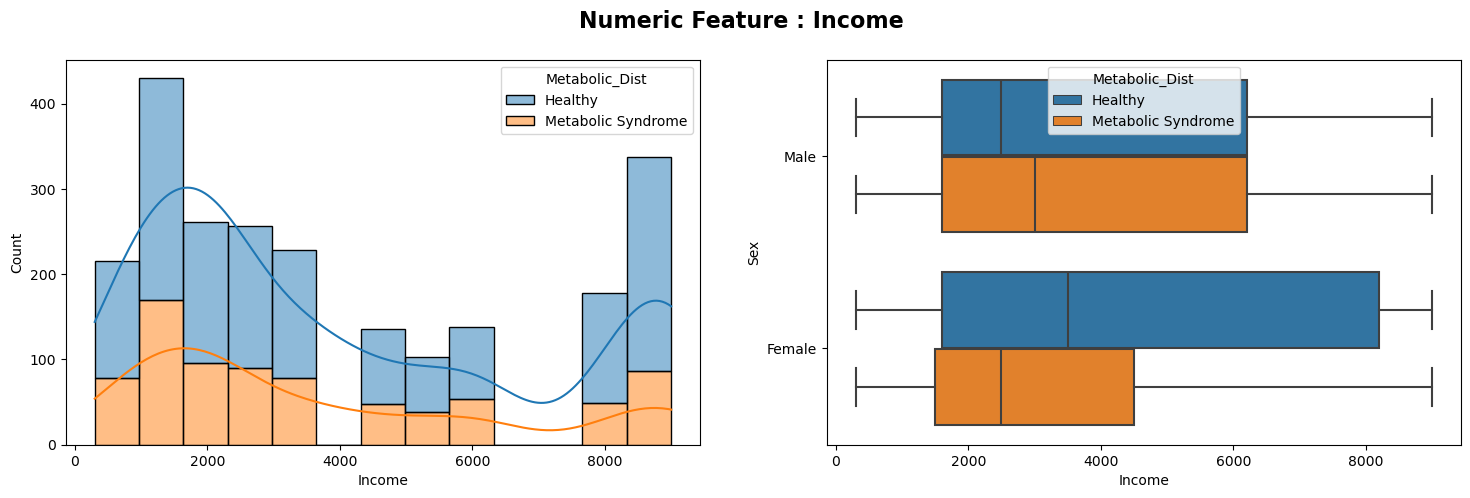

c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



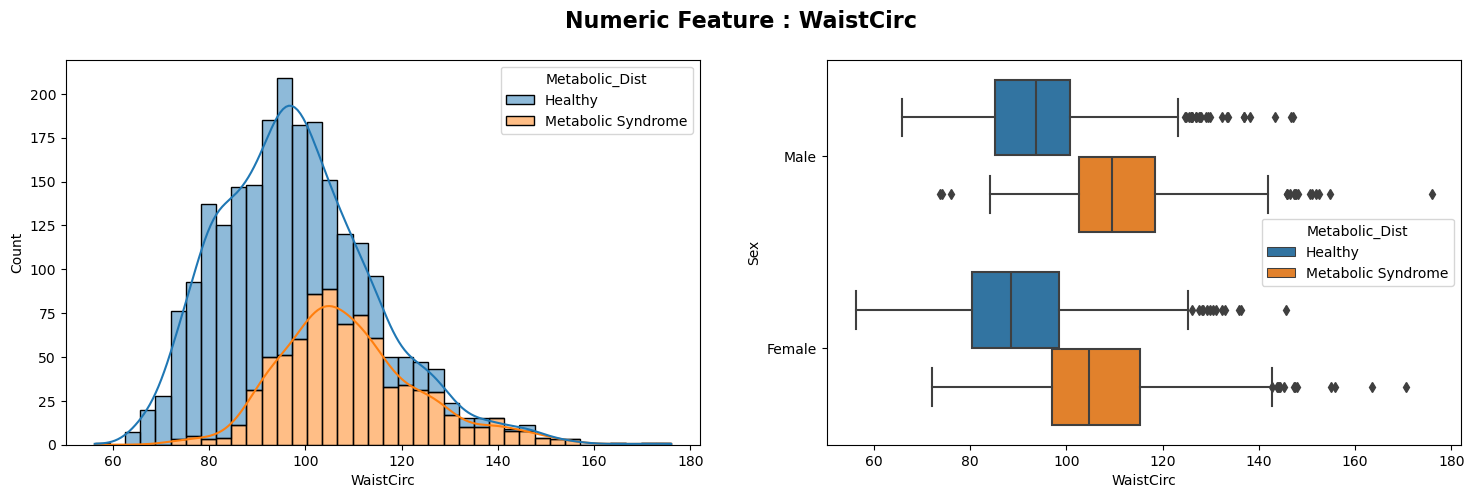

c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



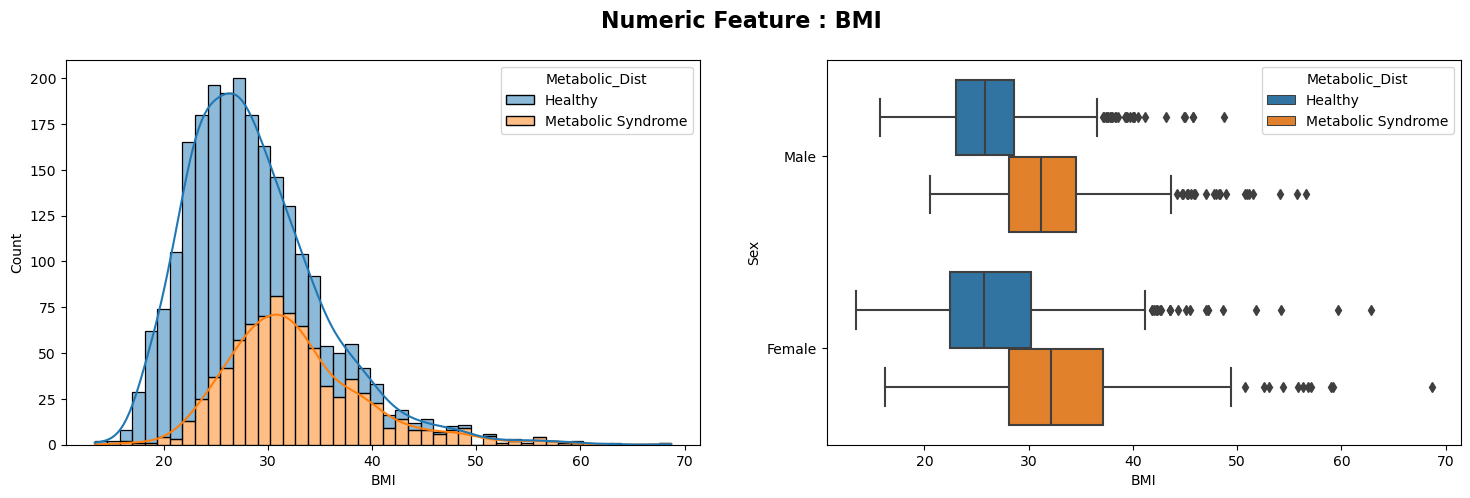

c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



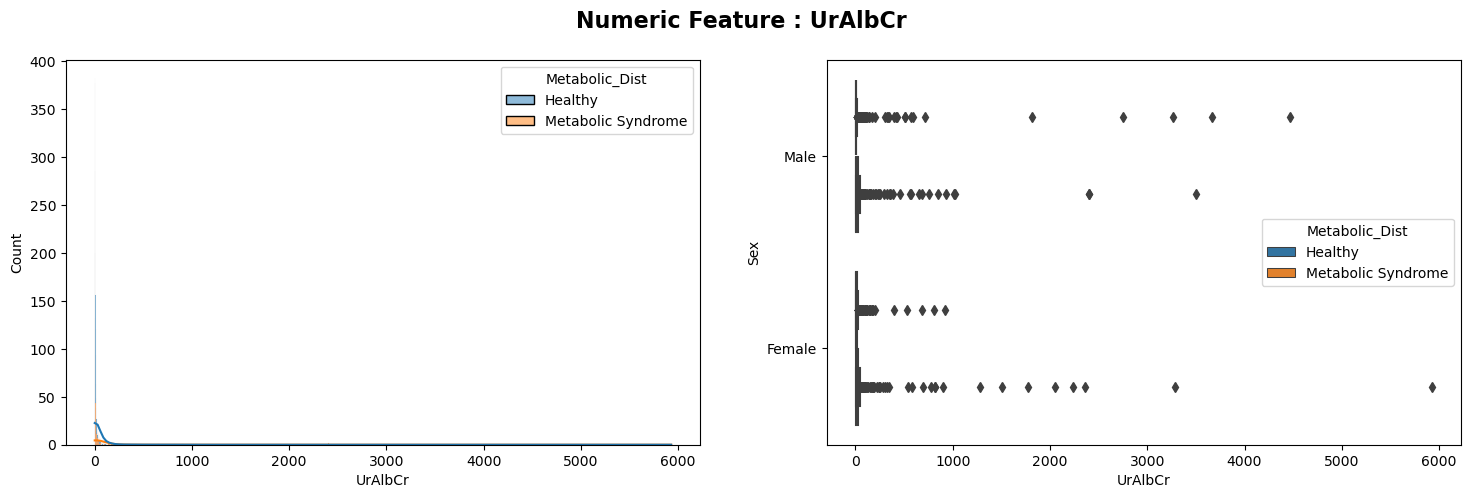

c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



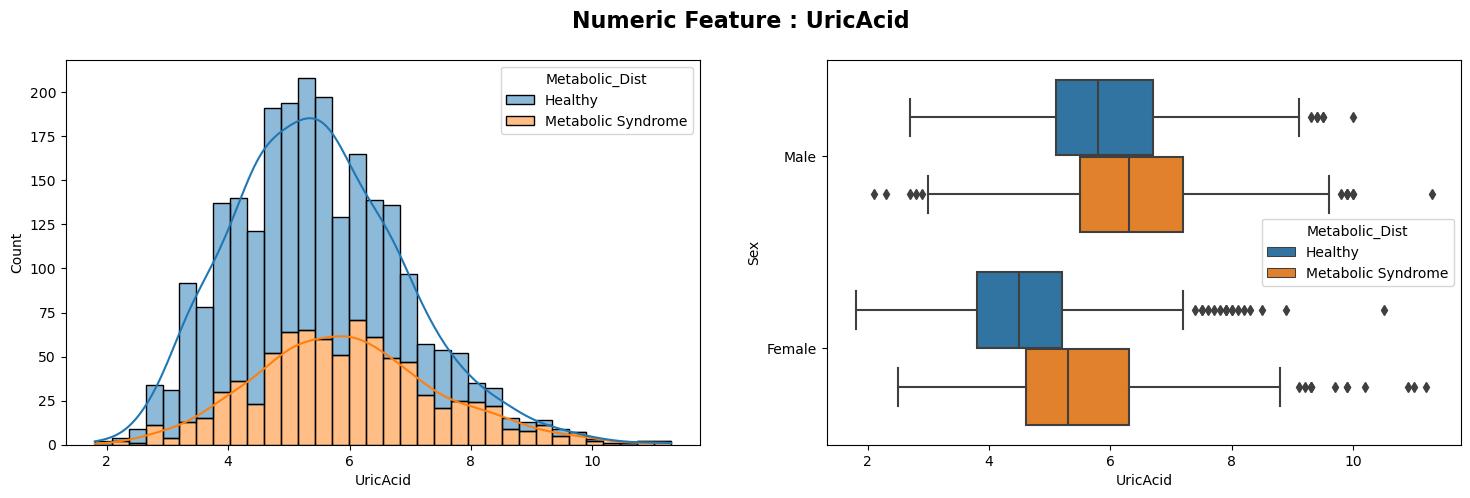

c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



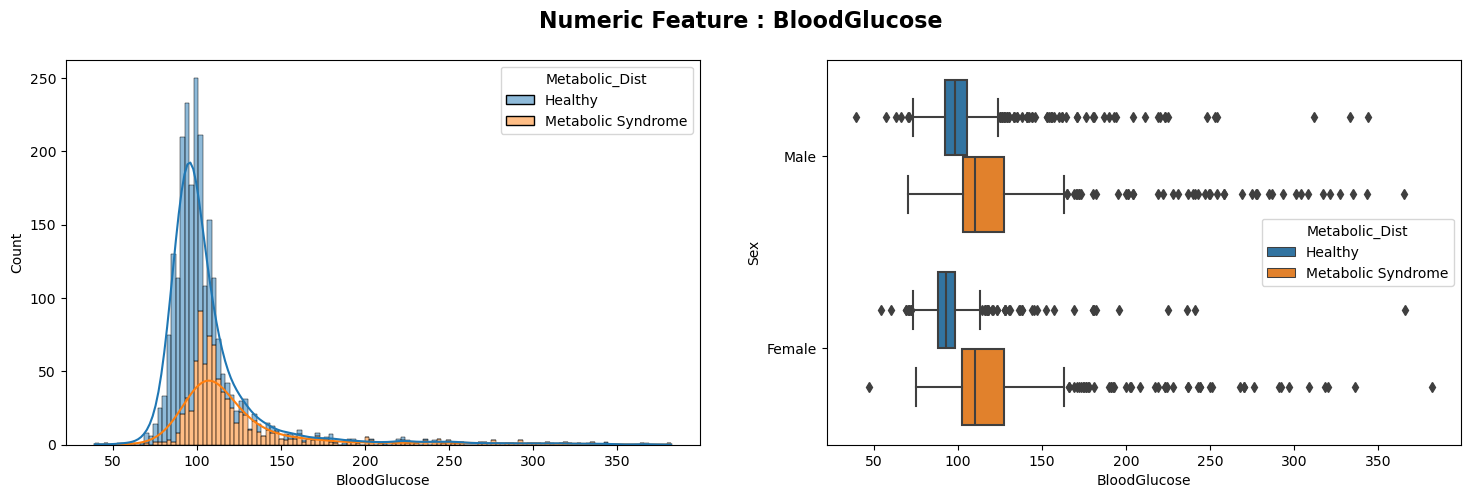

c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



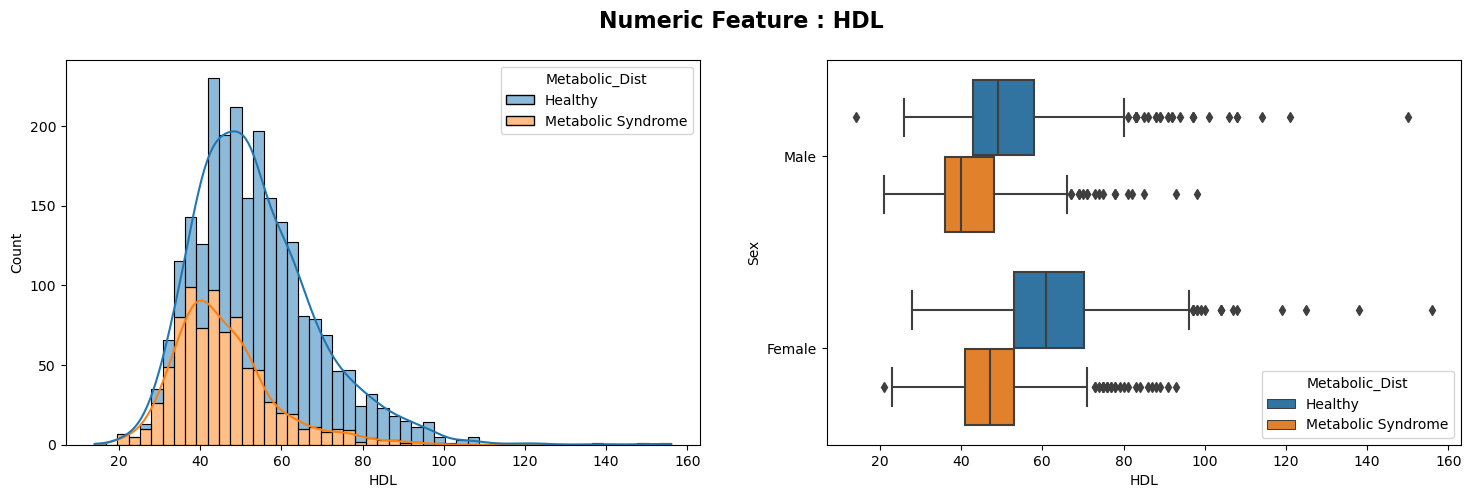

c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



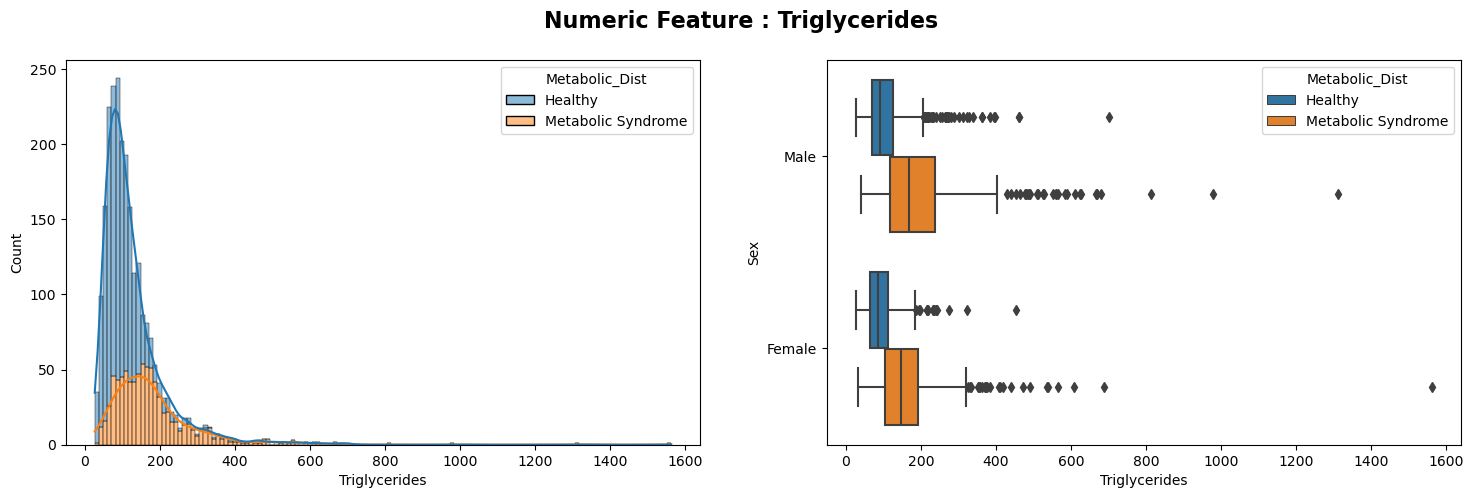

In [26]:
df_col=df.drop(columns=["seqn",'Albuminuria','MetabolicSyndrome', 'Age']).select_dtypes("number")

kde_boxplot(df,df_col)

In [25]:
fig = px.box(df, x="Sex", y="BMI", facet_col='Metabolic_Dist', color = 'Sex', color_discrete_map = sex_colors)

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

fig.update_layout(autosize=False, width=800,height=600)

c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a

<Figure size 800x640 with 0 Axes>

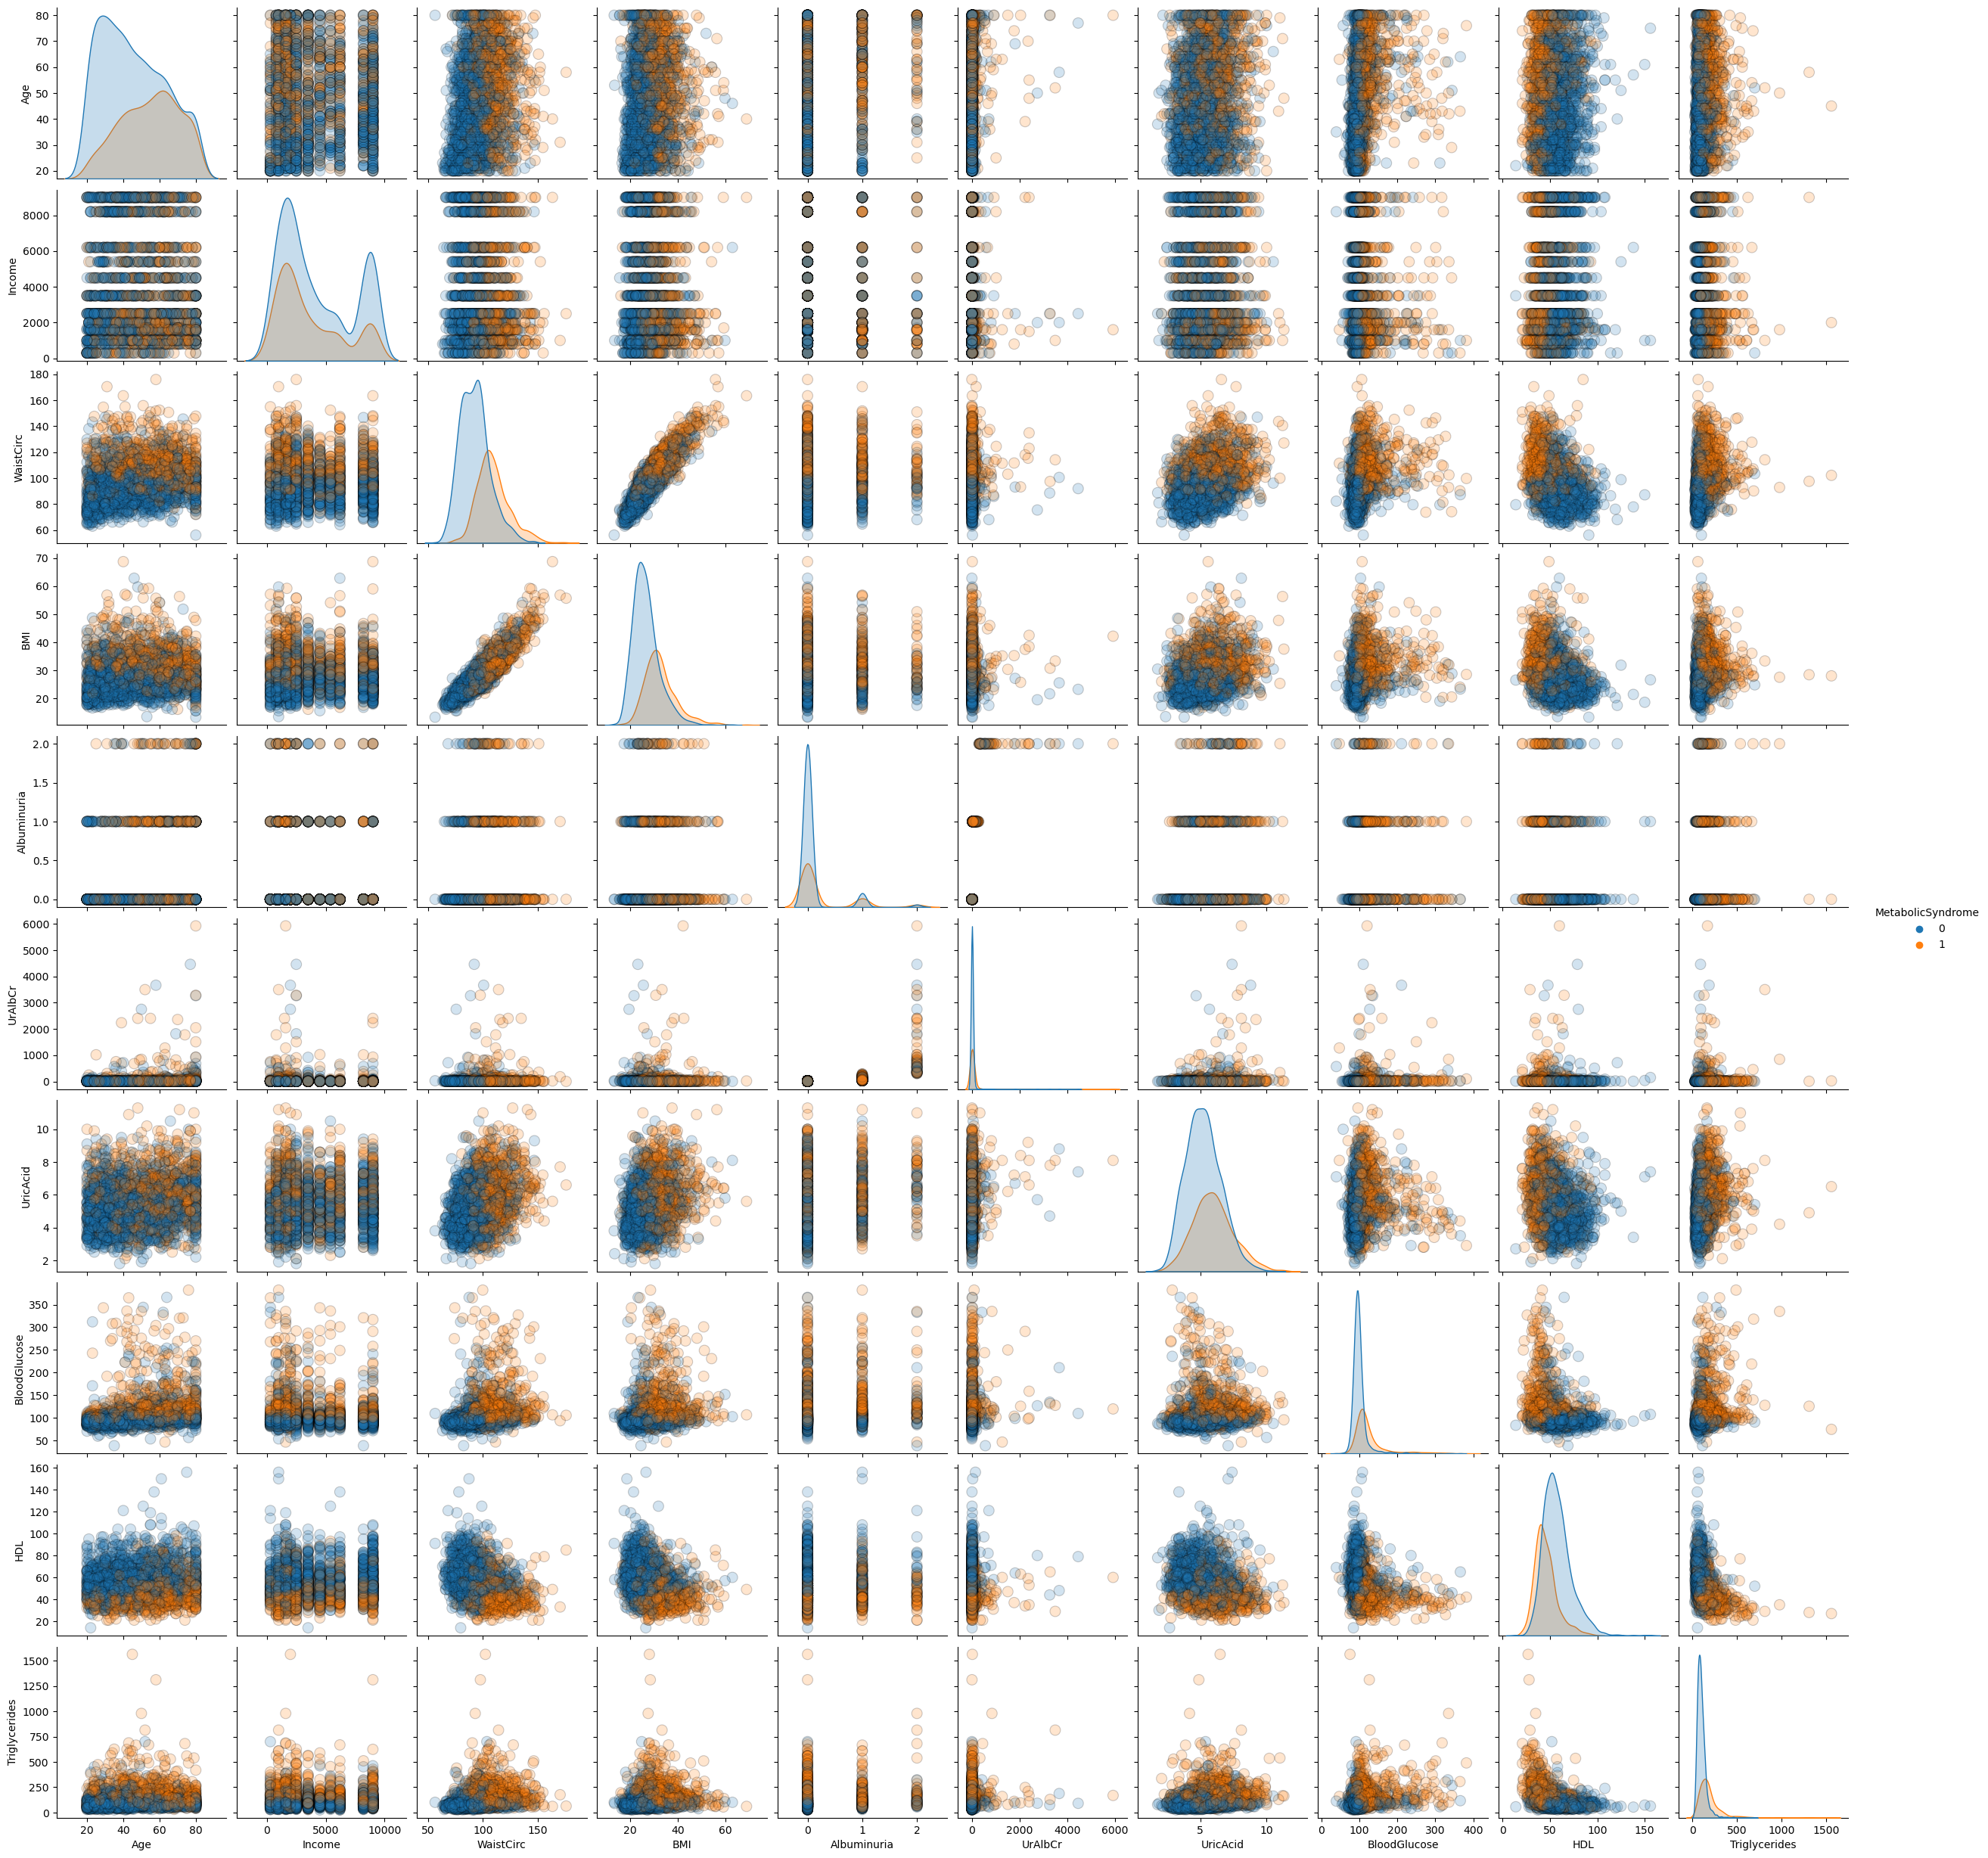

In [34]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df.loc[:, [i for i in df.columns if i != "seqn"]], 
             kind="scatter", hue="MetabolicSyndrome", plot_kws=dict(palette="Set2", edgecolor="k", s=100, alpha = 0.2))
plt.show()

In [35]:
from scipy.stats import chi2_contingency
df_sorted = df[["Sex",  'Age', "Marital", "Income", "Race", 'WaistCirc', 'BMI', 'UrAlbCr', 'UricAcid', 'BloodGlucose', 'HDL', 'Triglycerides',]]

def df_maker(col, row):
    DF = pd.DataFrame(data = None, index=row, columns=col)
    return DF

df_sorted = df_maker(list(df_sorted.columns), ["Overall normal distribution"])

def chi2test(feature, featname):
    contingency_table = pd.crosstab(df[feature],df['MetabolicSyndrome'])

    empiric = chi2_contingency(contingency_table)
    pvalue = round(empiric[1], 4)

    lim = 0.05
    if pvalue < lim:
        return True
    else:
        return False

for col in df_sorted.columns:
    try :
        df_sorted[col] = [chi2test(col, col+"feature")]
    except Exception:
        pass

display(df_sorted)

Sex   Age  Marital  Income  Race  WaistCirc  \
Overall normal distribution  False  True     True    True  True       True   

                              BMI  UrAlbCr  UricAcid  BloodGlucose   HDL  \
Overall normal distribution  True    False      True          True  True   

                             Triglycerides  
Overall normal distribution           True